<img src="../images/tinap.png" style="float: left; margin: 15px; height: 50px">

# Tina's Project - Ames House Sales Price Prediction

## 03. Model Selection - Linear Regression - Part 2
After building the first two models in part 1, I go back to features selection part in `02_Preprocessing_and_Feature_Engineering` to re-select the features I would like to train for a new model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import pickle

### Load Data

In [2]:
df_train = pd.read_csv('../data/train_ready_2.csv')
df_test = pd.read_csv('../data/test_ready_2.csv')

In [3]:
df_train.shape

(2047, 68)

In [4]:
df_test.shape

(878, 67)

Found 2 target variables are outliers when I take target variable to log. So, I come back and remove them.

In [5]:
df_train = df_train[np.log(df_train['SalePrice']) >= 10]

### Model 2.1 - X and y

In [7]:
# Set X and y
X = df_train.drop(columns = ['SalePrice', 'Id'])
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2022, 
                                                    train_size = 0.8)
lr = LinearRegression()
lr.fit(X_train, y_train)

r2_train = lr.score(X_train, y_train)
r2_test = lr.score(X_test, y_test)

print(f"Training R2 = {r2_train}")
print(f"Testing R2 = {r2_test}")

cv_mean = cross_val_score(lr, X, y, cv = 5).mean()
print(f"CV Score = {cv_mean}")

Training R2 = 0.8929230230766834
Testing R2 = 0.8747914097329709
CV Score = 0.87980612555339


##### LINE Assumption

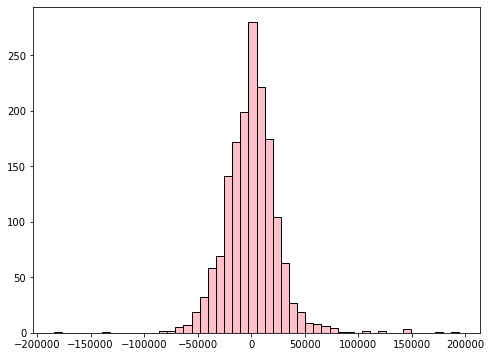

In [8]:
# N - Normality of errors
y_pred = lr.predict(X_train)
resids = y_train - y_pred

plt.figure(figsize = (8, 6))
plt.hist(resids, bins = 50, color = 'pink', edgecolor = 'black');

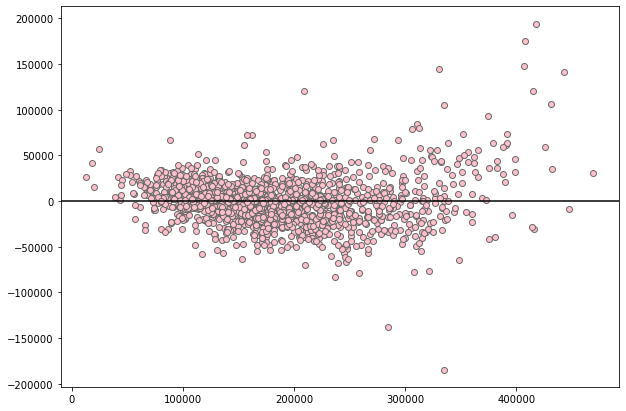

In [9]:
# E - Equal variance of errors
# Residual plot 
plt.figure(figsize = (10, 7))
plt.scatter(y_pred, resids, color = 'pink', edgecolor = 'dimgray')
plt.axhline(0, color = 'black');

### Model 2.2 - X and log( y )

In [10]:
# Set X and y
X = df_train.drop(columns = ['SalePrice', 'Id'])
y_log = np.log(df_train['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y_log, random_state = 2022, 
                                                    train_size = 0.8)
lr_logy = LinearRegression()
lr_logy.fit(X_train, y_train)

r2_train = lr_logy.score(X_train, y_train)
r2_test = lr_logy.score(X_test, y_test)

print(f"Training R2 = {r2_train}")
print(f"Testing R2 = {r2_test}")

cv_mean = cross_val_score(lr_logy, X, y_log, cv = 5).mean()
print(f"CV Score = {cv_mean}")

Training R2 = 0.9050198475992627
Testing R2 = 0.8885910817010758
CV Score = 0.8953384637790824


##### LINE Assumption

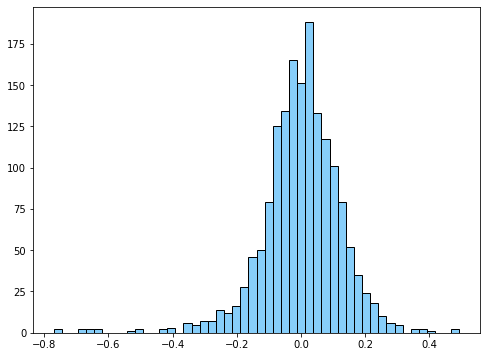

In [11]:
# N - Normality of errors
y_pred = lr_logy.predict(X_train)
resids = y_train - y_pred

plt.figure(figsize = (8, 6))
plt.hist(resids, bins = 50, color = 'lightskyblue', edgecolor = 'black');

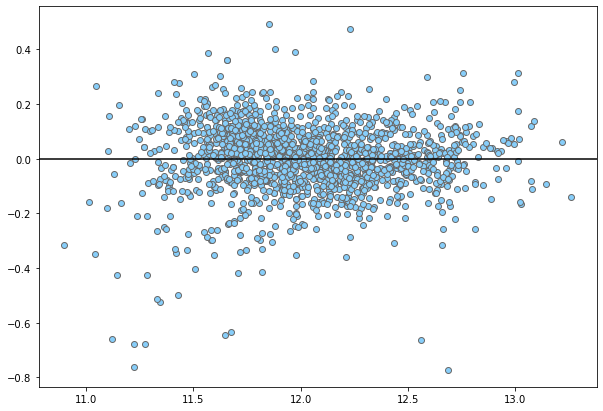

In [12]:
# E - Equal variance of errors
# Residual plot 
plt.figure(figsize = (10, 7))
plt.scatter(y_pred, resids, color = 'lightskyblue', edgecolor = 'dimgray')
plt.axhline(0, color = 'black');

### Summary
After reducing the number of features to put in into my model, I found the R-square in both models (model 2.1 and 2.2) are not getting better. Instead, they are both getting lower and remain almost the same distance between the training and testing scores.

However, I will still submit all results from all 4 models to Kaggle to see the difference between them.

### Save Models

In [90]:
pickle.dump(lr, open("model/model_201.model", 'wb'))
pickle.dump(lr_logy, open("model/model_202.model", 'wb'))

---
### Find Significant Features
Source: 
* [find p-value via statsmodels.api](https://www.statsmodels.org/stable/index.html)
* [get p-value in summary table](https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression)

In [13]:
X = sm.add_constant(X)
ols = sm.OLS(y, X).fit()
p_values = ols.summary2().tables[1]['P>|t|']
ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
=====================================================================================
Model:                    OLS                    Adj. R-squared:           0.887     
Dependent Variable:       SalePrice              AIC:                      47546.4208
Date:                     2022-10-12 14:57       BIC:                      47923.1721
No. Observations:         2045                   Log-Likelihood:           -23706.   
Df Model:                 66                     F-statistic:              243.6     
Df Residuals:             1978                   Prob (F-statistic):       0.00      
R-squared:                0.890                  Scale:                    7.0944e+08
-------------------------------------------------------------------------------------
                        Coef.      Std.Err.     t    P>|t|     [0.025       0.975]   
-------------------------------------------------------------------------------------
const                -161054.7437 16150.6991 -9.9720 0.0000 -192728.9139 -129380.5736
Bsmt Exposure           4004.3654   473.8315  8.4510 0.0000    3075.1041    4933.6268
total_baths             7595.5160  1040.8492  7.2974 0.0000    5554.2400    9636.7921
Overall Qual           10497.5789   818.0085 12.8331 0.0000    8893.3301   12101.8277
Mas Vnr Area              53.4964     5.4926  9.7397 0.0000      42.7245      64.2683
Fireplace Qu            2025.6272   426.1381  4.7535 0.0000    1189.9004    2861.3539
Garage Area               41.8492     4.7481  8.8140 0.0000      32.5375      51.1609
Heating QC              3152.3165   795.0239  3.9651 0.0001    1593.1442    4711.4888
Remod                   7191.4468  1425.1795  5.0460 0.0000    4396.4360    9986.4576
Bsmt Qual               -263.5955    45.8319 -5.7513 0.0000    -353.4794    -173.7115
Kitchen Qual           13080.1986  1374.3624  9.5173 0.0000   10384.8484   15775.5487
Pool QC                 6614.8863  2745.7861  2.4091 0.0161    1229.9493   11999.8232
new_house              22530.1699  3375.2370  6.6751 0.0000   15910.7766   29149.5633
Exter Cond              5428.4513  1697.1271  3.1986 0.0014    2100.1067    8756.7960
Garage Qual             7280.2387  2578.8867  2.8230 0.0048    2222.6189   12337.8585
total_sqft                36.5748     1.3682 26.7316 0.0000      33.8915      39.2581
Alley_No                2614.0389  3519.7016  0.7427 0.4578   -4288.6732    9516.7511
Alley_Pave            -12265.5968  5278.2040 -2.3238 0.0202  -22617.0207   -1914.1729
Mas Vnr Type_BrkFace   10476.6964  7697.1089  1.3611 0.1736   -4618.5967   25571.9895
Mas Vnr Type_No        27013.7190  9691.4746  2.7874 0.0054    8007.1475   46020.2905
Mas Vnr Type_None      21803.6928  7713.6980  2.8266 0.0048    6675.8656   36931.5199
Mas Vnr Type_Stone     19714.9154  7981.2083  2.4702 0.0136    4062.4568   35367.3740
Condition 1_Feedr       5647.6621  4296.0136  1.3146 0.1888   -2777.5253   14072.8495
Condition 1_Norm       13257.9170  3449.2322  3.8437 0.0001    6493.4068   20022.4272
Condition 1_PosA       32533.0424  8584.8577  3.7896 0.0002   15696.7281   49369.3566
Condition 1_PosN       30597.7715  6272.5569  4.8780 0.0000   18296.2586   42899.2844
Condition 1_RRAe        -278.6406  7054.5110 -0.0395 0.9685  -14113.6938   13556.4126
Condition 1_RRAn       10905.9272  5823.3008  1.8728 0.0612    -514.5208   22326.3752
Condition 1_RRNe        -776.8152 16147.6585 -0.0481 0.9616  -32445.0223   30891.3919
Condition 1_RRNn       -4426.1264 11615.9102 -0.3810 0.7032  -27206.8318   18354.5790
Garage Type_Attchd     26664.4647  6551.5936  4.0699 0.0000   13815.7149   39513.2145
Garage Type_Basment    22562.7236  8379.4988  2.6926 0.0071    6129.1519   38996.2953
Garage Type_BuiltIn    35704.5126  7011.0108  5.0926 0.0000   21954.7704   49454.2549
Garage Type_CarPort    12268.0436 10420.4779  1.1773 0.2392   -8168.2228   32704.3101
Garage Type_Detchd    

In [14]:
sig_xs = [i for i, v in zip(p_values.index, p_values.values) if v <= 0.01]
coef_cols = list(zip(X.columns, lr.coef_))
[(col, round(co, 2)) for col, co in coef_cols if col in sig_xs]

[('const', 3893.47),
 ('Bsmt Exposure', 8412.23),
 ('total_baths', 10514.98),
 ('Overall Qual', 52.34),
 ('Mas Vnr Area', 1990.93),
 ('Fireplace Qu', 36.02),
 ('Garage Area', 2276.01),
 ('Heating QC', 6040.43),
 ('Remod', -229.32),
 ('Bsmt Qual', 13540.79),
 ('Kitchen Qual', 3781.26),
 ('new_house', 4698.43),
 ('Exter Cond', 7743.42),
 ('Garage Qual', 35.45),
 ('total_sqft', 1972.48),
 ('Mas Vnr Type_No', 22161.18),
 ('Mas Vnr Type_None', 19676.53),
 ('Condition 1_Norm', 39198.6),
 ('Condition 1_PosA', 22719.37),
 ('Condition 1_PosN', -1806.98),
 ('Garage Type_Attchd', 11348.79),
 ('Garage Type_Basment', 27800.77),
 ('Garage Type_BuiltIn', 6107.34),
 ('Garage Type_Detchd', 43837.68),
 ('Garage Type_No', 13224.49),
 ('Land Contour_HLS', 5302.24),
 ('Lot Shape_IR2', -7402.43),
 ('Neighborhood_NoRidge', 27143.56),
 ('Neighborhood_NridgHt', -15042.75),
 ('Neighborhood_StoneBr', 2355.54)]